In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import os
import re
print(os.listdir("/Users/mukesh/developement/cmpe272"))

['input_Dataset.json', 'Sarcasm_Headlines_Dataset.json']


In [5]:
df = pd.read_json('/Users/mukesh/developement/cmpe272/Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

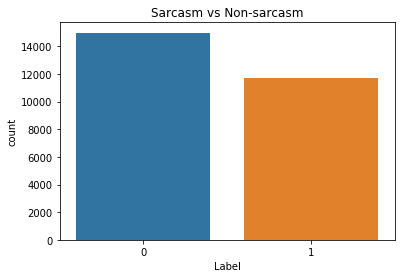

In [7]:
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [8]:
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [9]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)
X = pad_sequences(X)

In [10]:
Y = pd.get_dummies(df['is_sarcastic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


In [11]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

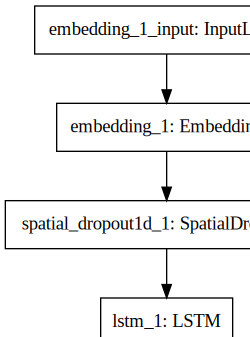

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot
import graphviz

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [13]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

/Users/mukesh/anaconda3/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/25
 - 21s - loss: 0.4457 - accuracy: 0.7845
Epoch 2/25
 - 28s - loss: 0.3371 - accuracy: 0.8534
Epoch 3/25
 - 22s - loss: 0.3011 - accuracy: 0.8712
Epoch 4/25
 - 21s - loss: 0.2766 - accuracy: 0.8827
Epoch 5/25
 - 25s - loss: 0.2551 - accuracy: 0.8951
Epoch 6/25
 - 25s - loss: 0.2359 - accuracy: 0.9012
Epoch 7/25
 - 20s - loss: 0.2186 - accuracy: 0.9095
Epoch 8/25
 - 20s - loss: 0.2029 - accuracy: 0.9158
Epoch 9/25
 - 20s - loss: 0.1899 - accuracy: 0.9225
Epoch 10/25
 - 20s - loss: 0.1751 - accuracy: 0.9295
Epoch 11/25
 - 20s - loss: 0.1636 - accuracy: 0.9346
Epoch 12/25
 - 20s - loss: 0.1538 - accuracy: 0.9376
Epoch 13/25
 - 20s - loss: 0.1397 - accuracy: 0.9417
Epoch 14/25
 - 20s - loss: 0.1286 - accuracy: 0.9490
Epoch 15/25
 - 20s - loss: 0.1146 - accuracy: 0.9554
Epoch 16/25
 - 21s - loss: 0.1129 - accuracy: 0.9565
Epoch 17/25
 - 20s - loss: 0.0994 - accuracy: 0.9608
Epoch 18/25
 - 20s - loss: 0.0926 - accuracy: 0.9632
Epoch 19/25
 - 20s - loss: 0.0912 - accuracy: 0.9640
Ep

In [14]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,accu = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (accu))

score: 0.96
acc: 0.82


In [15]:
# summarize history for accuracy
plt.plot(history.history['accu'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

KeyError: 'accu'

In [16]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

Sarcasm_acc 80.99547511312217 %
Non-Sarcasm_acc 82.91517323775388 %


In [65]:
headline = ['rt look familiar? the quickest way to turn a democracy into an autocracy is tested &amp; tried. it has always the same: *get ri…"']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)
sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

[9.9929082e-01 7.0913153e-04]
Non-sarcastic


In [86]:
import json

input_file = open ('/Users/mukesh/developement/cmpe272/data.json')
json_array = json.load(input_file)
store_list = []

for item in json_array:
    store_details = {"text":None, "location":None, "retweet_count":None, "favorite_count":None, "time_zone":None,  "is_sarcastic":None}
    store_details['text'] = item['text']
    store_details['location'] = item['location']
    store_details['retweet_count'] = item['retweet_count']
    store_details['favorite_count'] = item['favorite_count']
    store_details['time_zone'] = item['time_zone']
    store_list.append(store_details)

#print(store_list)
for i in store_list:
    headline=[i['text']]
    headline = tokenizer.texts_to_sequences(headline)
    headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)
    sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
    if(np.argmax(sentiment) == 0):
        i['is_sarcastic']=0
    elif (np.argmax(sentiment) == 1):
        i['is_sarcastic']=1
        
import json

with open('results', 'w') as outfile:
    json.dump(store_list, outfile)
    